W/ RADIO CUT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [4]:
fft = np.zeros(511)
hist = np.zeros(1024)
bins = np.linspace(-100, 924, 1025)
maxtrace = np.zeros(1024)
deviation = np.zeros(100)
pulse_width = np.zeros((1024, 1024))

for i in range(1,101):

    file=f"/cr/tempdata01/filip/SSDCalib/RadioCut/randoms{i:04d}_SSD.dat"

    try:
        SSD = np.loadtxt(file)
    except FileNotFoundError: continue

    for i, trace in enumerate(SSD):
        trace = trace[1:] - trace[0]
        hist += np.histogram(trace, bins=bins)[0]
        fft += np.abs(np.fft.fft(trace)[1:len(trace)//2])**2
        max_index = np.argmax(trace)
        deviation[min(int(np.std(trace)), 99)] += 1
        try:
            x = min(int(trace[max_index]) +50, 1023)
            y = min(int(trace[max_index +1]) +50, 1023)
            pulse_width[x, y] += 1
        except IndexError: pass

        for j in range(int(trace[max_index])):
            try:
                maxtrace[j] += 1
            except IndexError: pass

(25.0, 200.0)

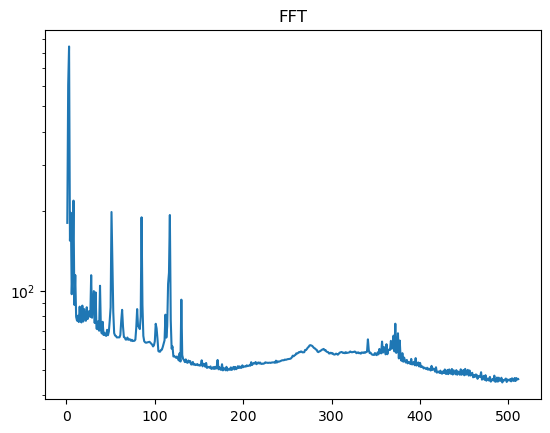

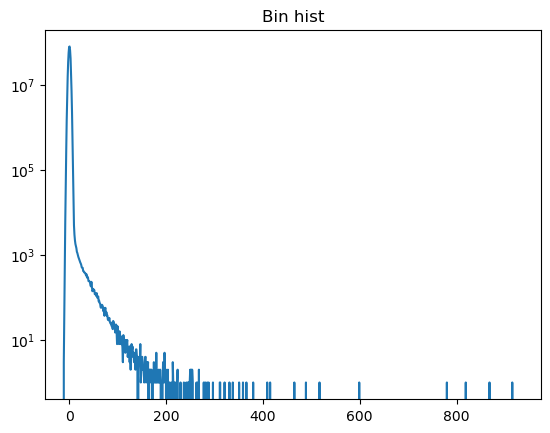

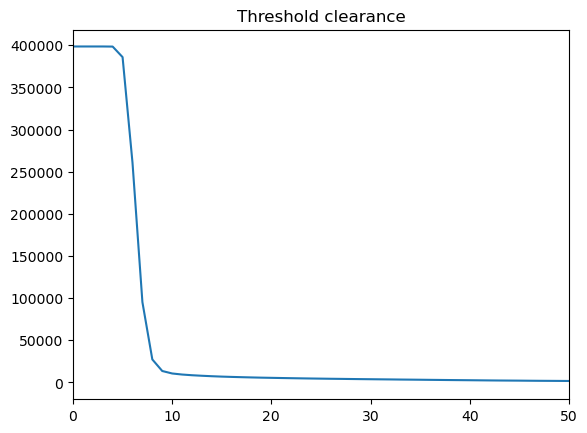

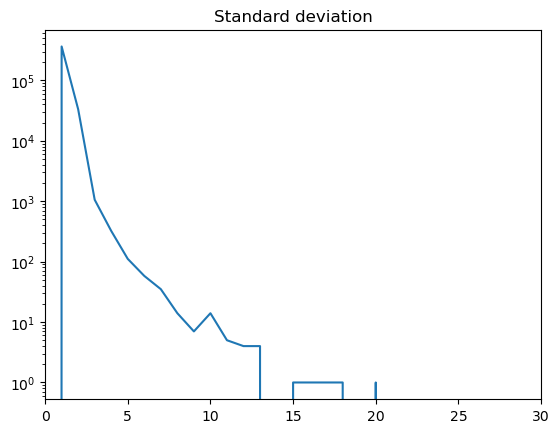

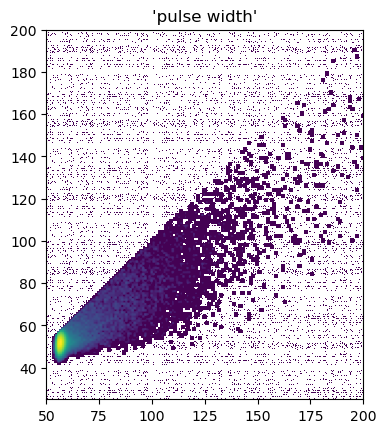

In [7]:
plt.title("FFT")
plt.plot(range(1,512), fft/5000**2)
plt.yscale("log")

plt.figure()
plt.title("Bin hist")
plt.plot(range(-100, 924), hist)
plt.yscale("log")
plt.xlim(-50,)

plt.figure()
plt.title("Threshold clearance")
plt.plot(range(1024), maxtrace)
plt.xlim(0,50)

plt.figure()
plt.title("Standard deviation")
plt.plot(range(100), deviation)
plt.xlim(0,30)
plt.yscale("log")

plt.figure()
plt.title("'pulse width'")
plt.imshow(pulse_width.T, norm="log", origin="lower")
plt.xlim(50,200)
plt.ylim(25,200)